<a href="https://colab.research.google.com/github/kingruss-afk/Data-Mining-CSC-587/blob/main/Lab10_SupportVectorMachinesW25_ICO_Russell_King.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn import svm
import pandas as pd
import numpy as np

C=1e+03 #1000
gamma=1e-05 #0.0001
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', probability=True)

In [3]:
import pandas as pd
train = pd.read_csv('/content/drive/My Drive/DATA/diabetes_train.csv') #this is our dataset, please change the path for your case
test = pd.read_csv('/content/drive/My Drive/DATA/diabetes_test.csv')
train.columns[:8] #wanted to show which attributs we have

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')

In [4]:
clf = clf.fit(train.iloc[:,0:8], train.iloc[:,8]) #first paramater data, second labels
y_pred = clf.predict(test.iloc[:,0:8]) #doing prediction on unknown test set
y_pred

array(['tested_negative', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative'], dtype=object)

In [5]:
from sklearn.metrics import confusion_matrix #let's see how good we did
y_true = test.iloc[:,8]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(np.int64(6), np.int64(1), np.int64(1), np.int64(2))

In [6]:
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', probability=True)
C=[1e+03, 1e+04, 1e+05]
gamma=[1e-05, 1e-06, 1e-07]
for c in C:
  for g in gamma:
    clf = svm.SVC(C=c, gamma=g, kernel='rbf', probability=True)
    clf.fit(train.iloc[:,0:8], train.iloc[:,8])
    y_pred = clf.predict(test.iloc[:,0:8])
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(c, g, (tp+tn)/(tp+tn+fp+fn))

1000.0 1e-05 0.8
1000.0 1e-06 0.9
1000.0 1e-07 0.9
10000.0 1e-05 0.8
10000.0 1e-06 0.8
10000.0 1e-07 0.9
100000.0 1e-05 0.8
100000.0 1e-06 0.9
100000.0 1e-07 0.9


In [14]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Get true labels and predicted probabilities
y = test.iloc[:,8]
scores = clf.predict_proba(test.iloc[:,0:8])[:, 1]  # Get probabilities for the positive class

# Map y to binary values if needed
if y.dtype == 'O':
    y = y.map({'tested_negative': 0, 'tested_positive': 1})

# ROC curve calculation
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Print results
print("False Positive Rates:", fpr)
print("True Positive Rates:", tpr)
print("Thresholds:", thresholds)
print("ROC AUC:", roc_auc)

False Positive Rates: [0.         0.         0.         0.28571429 0.28571429 1.        ]
True Positive Rates: [0.         0.33333333 0.66666667 0.66666667 1.         1.        ]
Thresholds: [       inf 0.90959138 0.88996732 0.33846803 0.26435185 0.10398279]
ROC AUC: 0.9047619047619048


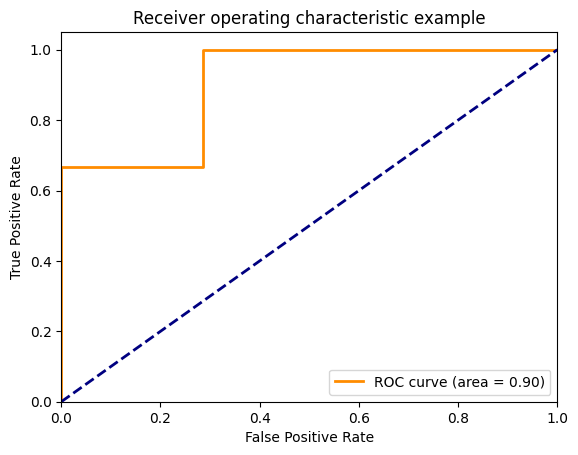

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [26]:
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', probability=True)
C=[1000000000000, 2000000000000, 300000000000]
gamma=[100, 120, 130] # Corrected gamma values
for c in C:
  for g in gamma:
    clf = svm.SVC(C=c, gamma=g, kernel='rbf', probability=True)
    clf.fit(train.iloc[:,0:8], train.iloc[:,8])
    y_pred = clf.predict(test.iloc[:,0:8])
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(c, g, (tp+tn)/(tp+tn+fp+fn))

1000000000000 100 0.7
1000000000000 120 0.7
1000000000000 130 0.7
2000000000000 100 0.7
2000000000000 120 0.7
2000000000000 130 0.7
300000000000 100 0.7
300000000000 120 0.7
300000000000 130 0.7


In [27]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Get true labels and predicted probabilities
y = test.iloc[:,8]
scores = clf.predict_proba(test.iloc[:,0:8])[:, 1]  # Get probabilities for the positive class

# Map y to binary values if needed
if y.dtype == 'O':
    y = y.map({'tested_negative': 0, 'tested_positive': 1})

# ROC curve calculation
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Print results
print("False Positive Rates:", fpr)
print("True Positive Rates:", tpr)
print("Thresholds:", thresholds)
print("ROC AUC:", roc_auc)

False Positive Rates: [0. 1.]
True Positive Rates: [0. 1.]
Thresholds: [       inf 0.35090647]
ROC AUC: 0.5


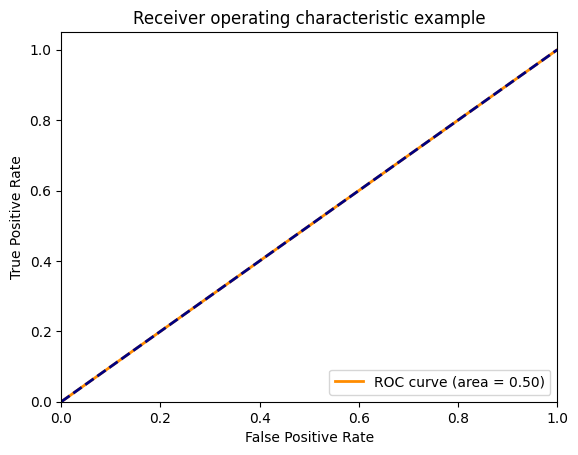

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()